# Домашнее задание 11

## Тема
Тема 11. Задачи классификации и кластеризации

## Описание задания
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


Убедись, что:

1. Для задачи классификации после построения модели посчитана метрика accuracy, и она больше 0.7.
2. Количество кластеров равно количеству классов в зависимой переменной.
3. Построена модель LDA.
4. Визуализированы предсказания для тестовой выборки и центры классов.
5. Подобрано оптимальное число кластеров для алгоритма kmeans и визуализирована полученная кластеризация.

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.cluster.hierarchy import dendrogram, linkage


In [169]:
# Берем датасет с цветками iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Оставляем два признака
df = df[['sepal length (cm)', 'sepal width (cm)']]
df['variety'] = iris['target']
df


,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [170]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.3, random_state=42)

In [171]:
# Строим LDA-модель
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
y_pred=lda.predict(X_test)

In [172]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, y_pred]).T
display(result.T)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1,0,2,1,1,0,1,2,1,1,...,2,1,0,0,0,2,1,1,0,0
1,1,0,2,1,2,0,1,2,1,1,...,2,2,0,0,0,1,1,2,0,0


In [173]:
# рассчитываем точность - отношение верных прогнозов к общему количеству
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность LDA модели: {accuracy:.2f}")

Точность LDA модели: 0.84


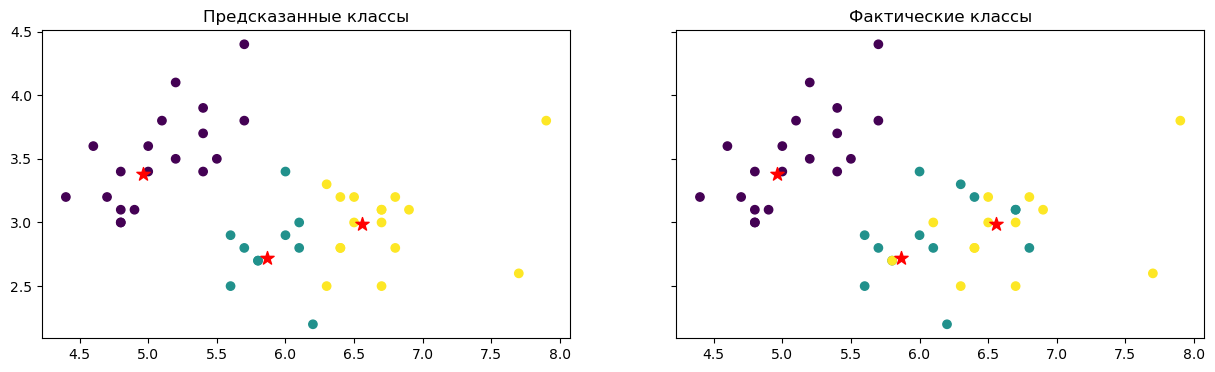

In [174]:
# Визуализируем предсказания для тестовой выборки и центры классов
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
ax1.scatter(
x = X_test['sepal length (cm)'],
y = X_test['sepal width (cm)'], 
c = y_pred)
ax1.set_title('Предсказанные классы')
ax1.scatter(lda.means_[:,0], lda.means_[:,1], c='r', s=100, marker='*')
ax2.scatter(
x = X_test['sepal length (cm)'],
y = X_test['sepal width (cm)'], 
c = y_test)
ax2.set_title('Фактические классы')
ax2.scatter(lda.means_[:,0], lda.means_[:,1], c='r', s=100, marker='*')  

In [175]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_test, y_pred)
# центры классов
lda.means_

array([[5.07368421, 3.51052632, 0.        ],
       [5.89      , 2.79      , 1.2       ],
       [6.73125   , 3.        , 1.6875    ]])

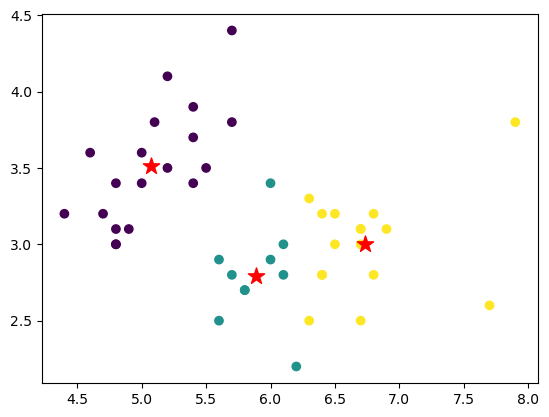

In [176]:
# Визуализация предсказания для тестовой выборки и центры классов
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [177]:
# Отбрасываем целевую переменную из df
df2 = df[['sepal length (cm)', 'sepal width (cm)']]
df2

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [178]:
# Подбираем оптимальное число кластеров для алгоритма kmeans
X = df2[['sepal length (cm)', 'sepal width (cm)']].to_numpy()
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [40.0, 40.0, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [51.875, 51.875, 110.0, 110.0],
  [12.5, 12.5, 80.9375, 80.9375],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [142.5, 142.5, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [212.5, 212.5, 244.375, 244.375],
  [161.25, 161.25, 228.4375, 228.4375],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [290.0, 

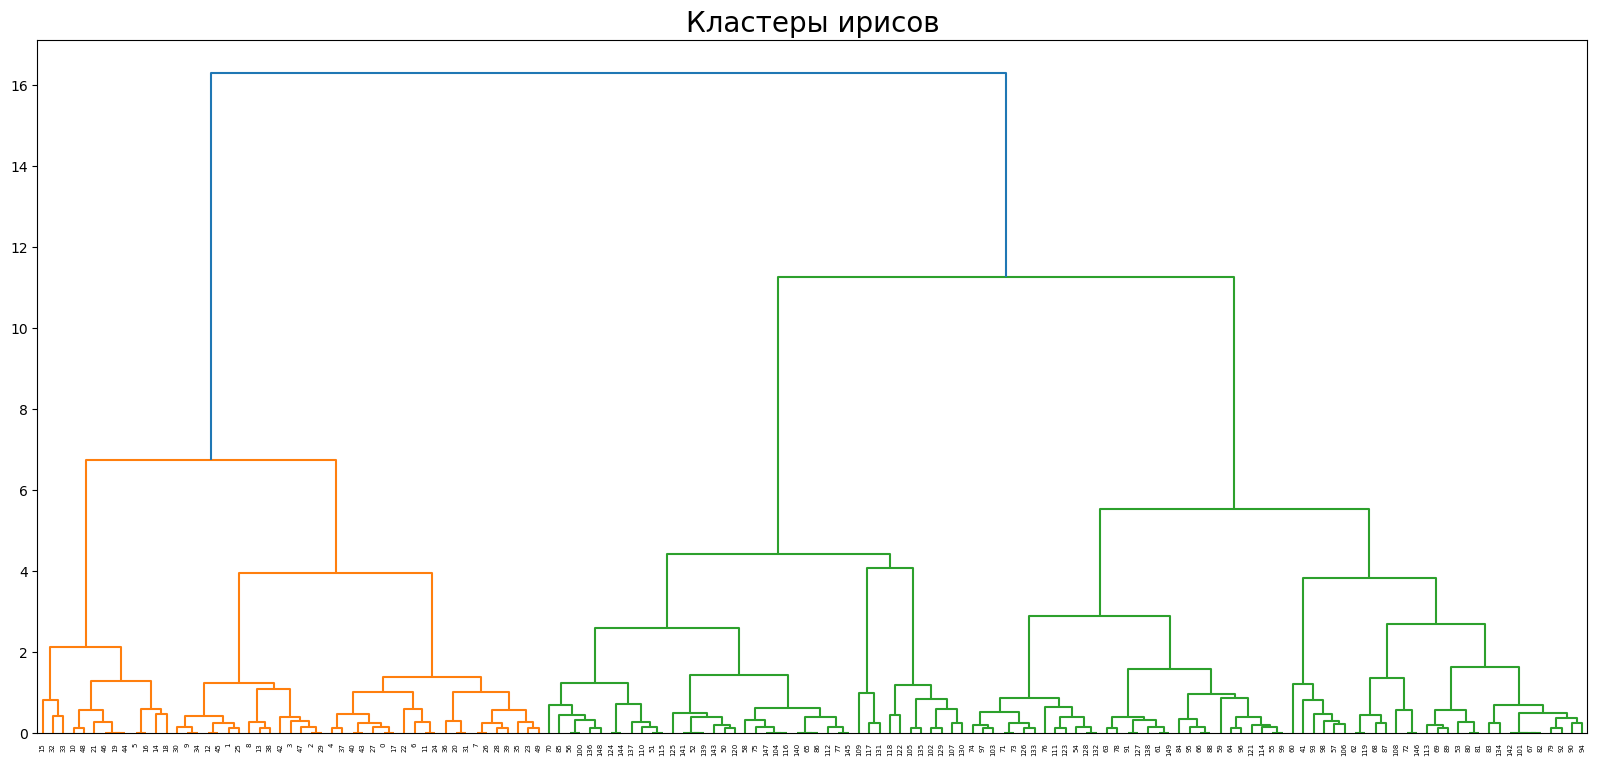

In [179]:
# приведем данные к единому масштабу
scaler = StandardScaler()
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
links = linkage(X_scaled, method = 'ward')
plt.figure(figsize=(20, 9))
plt.title('Кластеры ирисов', size=20)
dendrogram(links)

c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

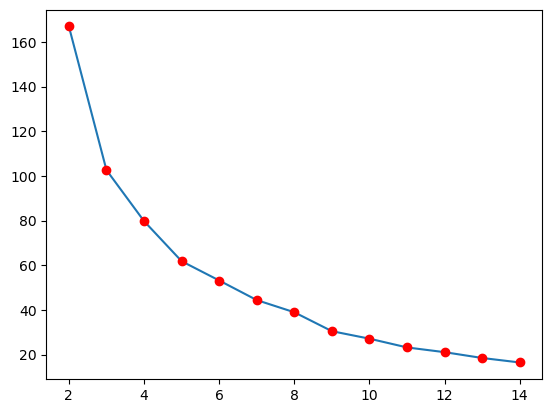

In [180]:
# строим график локтя
k_inertia = []
ks = range(2,15)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    labels = clf_kmeans.fit_predict(X_scaled)
    s_score = silhouette_score(X_scaled, labels)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')
plt.show()

Из графика инерций видно, что сильнее всего инерция уменьшается в точке 2

c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

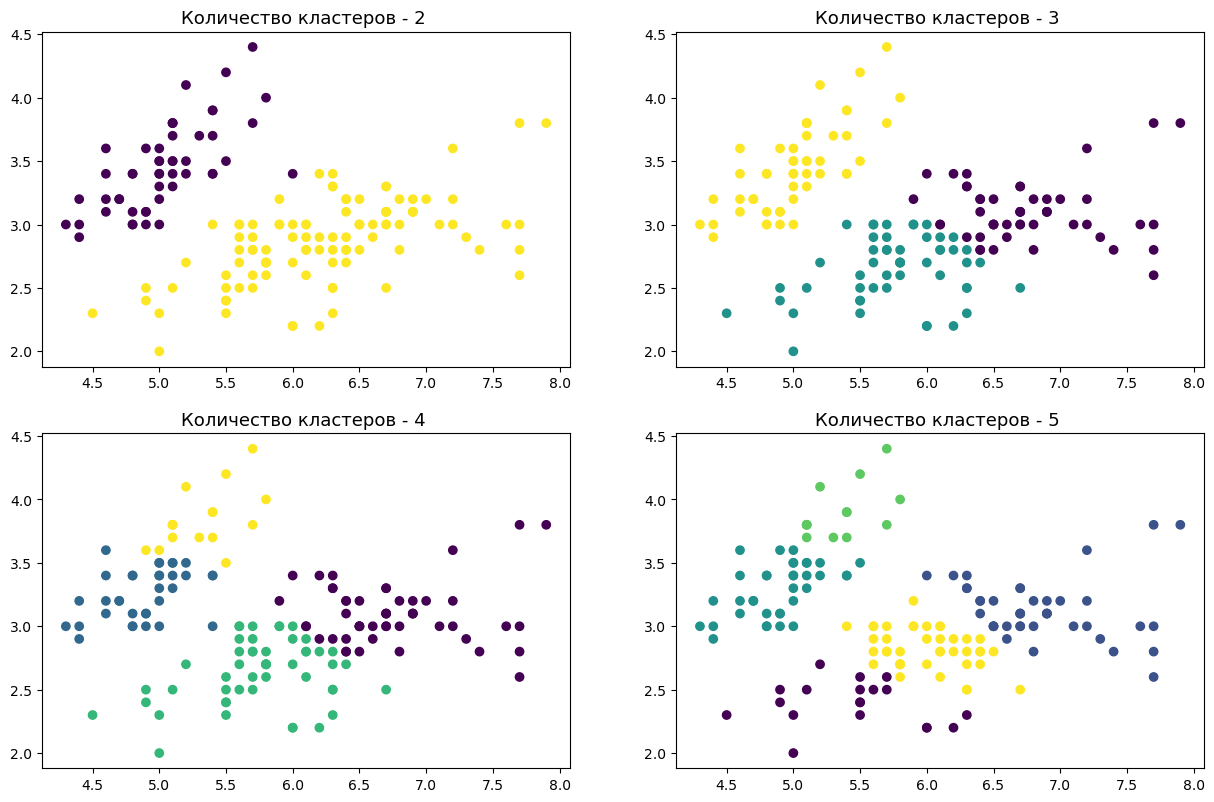

In [181]:
def clust(df_, n_clusters = 2):
    df = df_.copy()
    X = df.drop(['variety'], axis = 1) 
    sc = StandardScaler()
    X_sc = sc.fit_transform(X)
    km = KMeans(n_clusters = n_clusters, random_state=42)
    labels = km.fit_predict(X_sc)
    df['cluster'] = labels
    plt.scatter(x = X['sepal length (cm)'],y = X['sepal width (cm)'], 
    c = labels)
    plt.title(f'Количество кластеров - {n_clusters} ', size=13)
    
fig = plt.figure(figsize=(15,20))
for i in range(2, 6):
    fig.add_subplot(4, 2, i+1)
    clust(df, n_clusters = i)

Заметно что при делении на 2 кластера видны 2 области (за исключением 1 фиолетовой точки с координатами (2.3, 4.5)
При делении на 3 кластера все точки на своих местах, но между двумя нижними областями легкая диффузия. Все же верхнее поле отделено более очевидным образом
При делении на 4 и 5 кластеров все вроде не так плохо, но это уже деление ради деления


Вывод: 2 кластера

c:\ProgramData\anaconda3\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


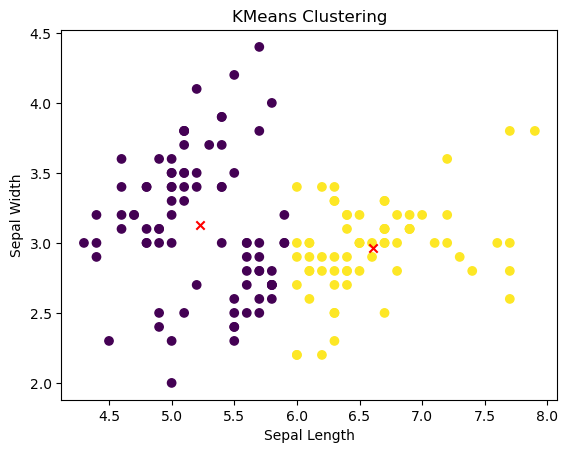

In [182]:
# Визуализируем полученную кластеризацию для оптимального числа кластеров:
X_new = iris.data[:, :2]
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_new)
labels = kmeans.labels_

plt.scatter(X_new[:, 0], X_new[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')
plt.show()

In [183]:
# Для задачи классификации вычислим метрику accuracy (должна быть больше 0,7):

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8444444444444444
